In [47]:
import numpy as np
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt

In [48]:
baza=pd.read_csv("Netflix_all.csv")

In [49]:
najboljpopularni=baza.sort_values(by=['averageRating'] , ascending=False).head(1000)
razmerje=najboljpopularni["type"].value_counts()


In [50]:
df=DataFrame([razmerje[0],razmerje[1]],columns=["type"],index=['Movie',"TV Show"])

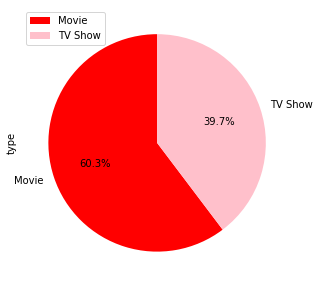

In [51]:
df.plot.pie(subplots=True , figsize=(5,5),autopct='%1.1f%%', startangle=90, colors = ['red', 'pink'])
plt.show()

In [52]:
slovar={}
for kr in baza['country']:
    if(kr!="0"):
        split=kr.split(", ")
        for s in split:
            if s not in slovar:
                slovar[s]=1
            else:
                num=slovar[s]
                slovar[s]=num+1

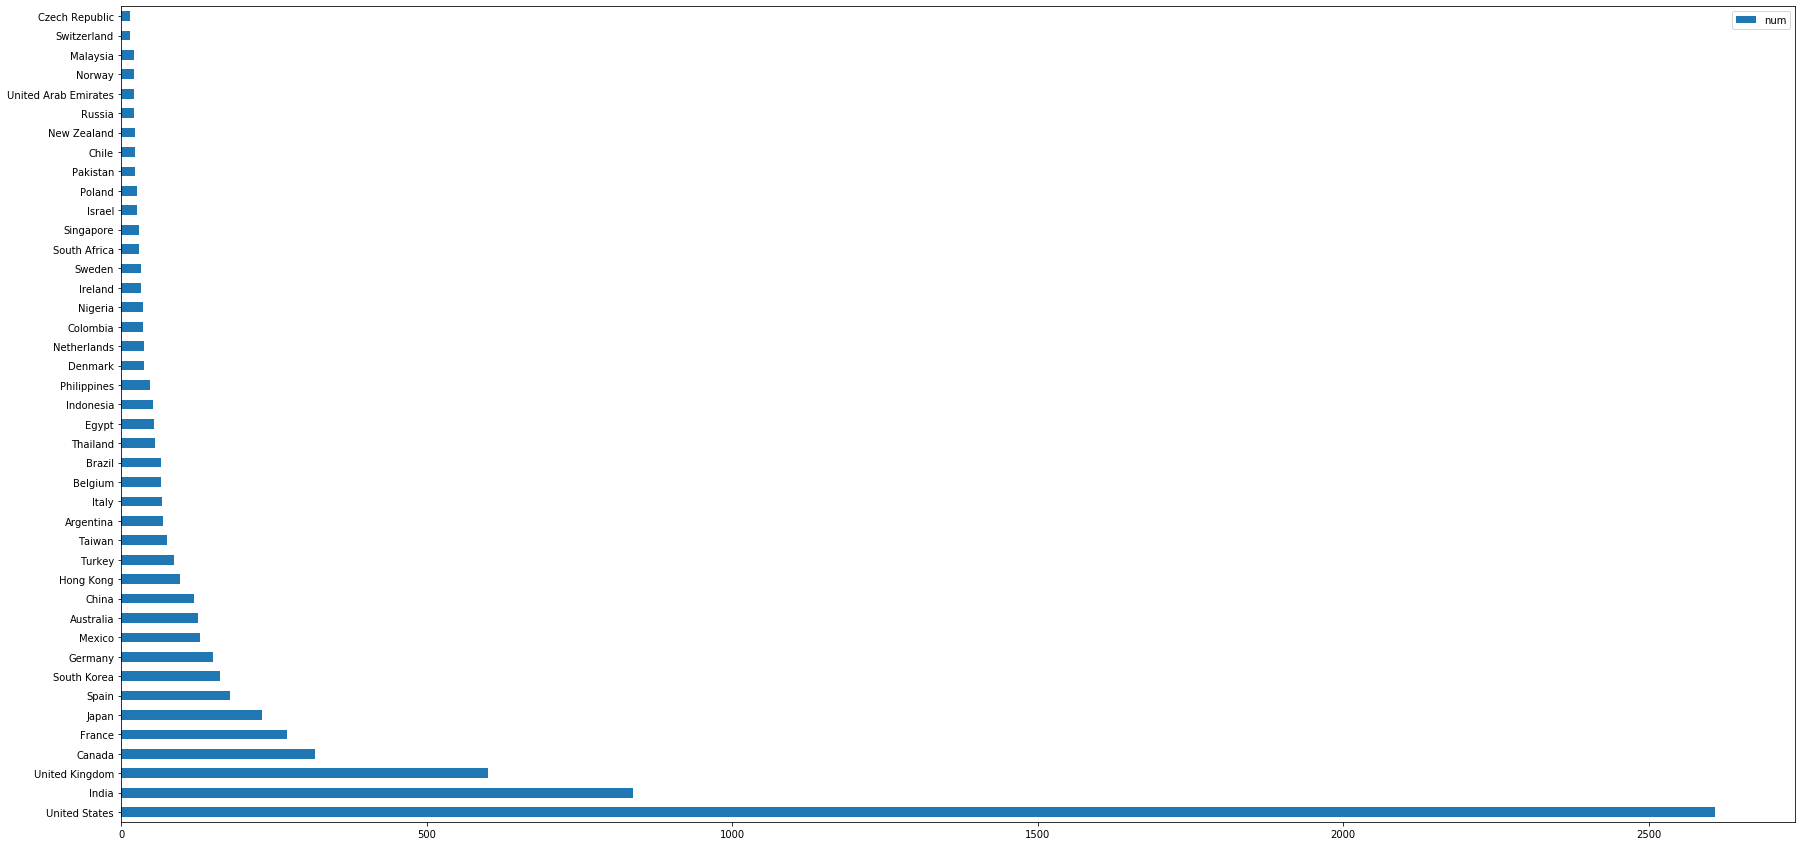

In [53]:
df=pd.DataFrame.from_dict(slovar,orient='index',columns=["num"])
df=df.sort_values("num",ascending=False)
df[df["num"]>10].plot(y="num", kind='barh',figsize=(30,15))

In [54]:
slovar={}
stevec=0
splitano=""
skip=0
for jak,avg in baza[["director","averageRating"]].iterrows():
    for name in avg:
        if(name!="-1"):
            if(skip!=1):
                if(stevec==0):
                    splitano=name.split(",")
                    for na in splitano:
                        if na not in slovar:
                            slovar[na]=[]
                    stevec+=1
                else:
                    for na in splitano:
                        seznam=slovar[na]
                        seznam.append(name)
                        slovar[na]=seznam
                    stevec=0
            else:
                skip=0
        else:
            skip=1

In [55]:
def Average(lst): 
    return sum(lst) / len(lst)

In [56]:
drugislovar={}
for key in slovar.keys():
        seznam=slovar[key]
        if -1.0 in seznam:
            seznam.remove(-1.0)
        if(len(seznam)>2):
            if Average(seznam)>0:
                drugislovar[key]=Average(seznam)
drugislovar

{'Rajkumar Hirani': 8.1,
 'Banjong Pisanthanakun': 7.0249999999999995,
 'Lynn Shelton': 6.733333333333334,
 'Gregory Hoblit': 6.619999999999999,
 'Jesse V. Johnson': 5.65,
 'Mike Flanagan': 6.466666666666666,
 'William Lau': 6.319999999999999,
 'Jeremy Saulnier': 6.375,
 'Rocky Soraya': 5.783333333333334,
 'Rob Cohen': 5.833333333333333,
 'B. V. Nandini Reddy': 2.466666666666667,
 'Ava DuVernay': 7.133333333333333,
 'Troy Miller': 6.0,
 'Bobcat Goldthwait': 6.733333333333334,
 'Morgan Neville': 7.366666666666667,
 'Niyi Akinmolayan': 4.966666666666667,
 'Cary Joji Fukunaga': 7.766666666666667,
 'Bedran Güzel': 5.866666666666667,
 'Conrad Helten': 5.433333333333333,
 'Cheh Chang': 4.833333333333333,
 'Manny Rodriguez': 7.540000000000001,
 'Louis C.K.': 8.0,
 'Orlando von Einsiedel': 7.566666666666666,
 'Timothy Woodward Jr.': 5.5,
 'Riri Riza': 7.419999999999999,
 'Kıvanç Baruönü': 5.9,
 'Michael Simon': 7.040000000000001,
 'Ryan Polito': 7.0625,
 'Petra Costa': 7.233333333333333,
 'Kun

In [57]:
import matplotlib.pyplot as plt

In [58]:
drugislovar={k: v for k, v in sorted(drugislovar.items(), key=lambda item: item[1])}


In [59]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [60]:
prvih20={}
stevec=0
zadnjih20={}
for key in drugislovar.keys():
    stevec+=1
    if len(drugislovar)-stevec<=5:
        zadnjih20[key]=drugislovar[key]
stevec=0
for key in drugislovar.keys():
    stevec+=1
    if stevec<=5:
        prvih20[key]=drugislovar[key]

In [61]:
prvih20

{'B. V. Nandini Reddy': 2.466666666666667,
 'Matt Askem': 2.7,
 'Luis Ara': 3.4,
 'Detlev Buck': 3.575,
 'Ahmad El-Badri': 3.9}

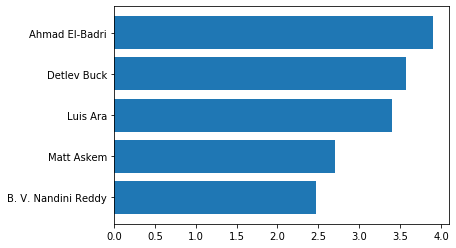

In [62]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Make fake dataset
height = prvih20.values()
bars = prvih20.keys()
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

In [63]:
stevec=0
splitano=""
skip=0
slovardrzave={}
for jak,avg in baza[["director","country",]].iterrows():
     for name in avg:
        if(name!="-1"):
            if(skip!=1):
                if(stevec==0):
                    splitano=name.split(",")
                    for na in splitano:
                        if na not in slovardrzave:
                            slovardrzave[na]=[]
                    stevec+=1
                else:
                    for na in splitano:
                        seznam=slovardrzave[na]
                        for co in name.split(","):
                            if co!="":
                                if co not in seznam and co!="0":
                                    if co[0]==" ":
                                        co=co[1:]
                                    seznam.append(co)
                                slovardrzave[na]=seznam
                    stevec=0
            else:
                skip=0
        else:
            skip=1

In [64]:
usa={}
fra={}
uk={}
som={}
aze={}
for director in drugislovar.keys():
    if "Germany" in slovardrzave[director]:
        if director not in aze.keys():
            aze[director]=drugislovar[director]
    if "India" in slovardrzave[director]:
        if director not in som.keys():
            som[director]=drugislovar[director]
    if "United Kingdom" in slovardrzave[director]:
        if director not in uk.keys():
            uk[director]=drugislovar[director]
    if "France" in slovardrzave[director]:
        if director not in fra.keys():
            fra[director]=drugislovar[director]
    if "United States" in slovardrzave[director]:
        if director not in usa.keys():
            usa[director]=drugislovar[director]

In [65]:
usa={k: v for k, v in sorted(usa.items(), key=lambda item: item[1])}
aze={k: v for k, v in sorted(aze.items(), key=lambda item: item[1])}
som={k: v for k, v in sorted(som.items(), key=lambda item: item[1])}
uk={k: v for k, v in sorted(uk.items(), key=lambda item: item[1])}
fra={k: v for k, v in sorted(fra.items(), key=lambda item: item[1])}

In [66]:
def vrnislovarje(slova):
    prvih20={}
    stevec=0
    zadnjih20={}
    for key in slova.keys():
        stevec+=1
        if len(slova)-stevec<=5:
            zadnjih20[key]=slova[key]
    stevec=0
    for key in slova.keys():
        stevec+=1
        if stevec<=5:
            prvih20[key]=slova[key]
    return prvih20,zadnjih20

In [67]:
usap,usaz=vrnislovarje(usa)
gerp,gerz=vrnislovarje(aze)
indip,indiz=vrnislovarje(som)
ukp,ukz=vrnislovarje(uk)
frap,praz=vrnislovarje(fra)

In [68]:
def narisigraf(slovar):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Make fake dataset
    height = slovar.values()
    bars = slovar.keys()
    y_pos = np.arange(len(bars))
    
    # Create horizontal bars
    plt.barh(y_pos, height)
    
    # Create names on the y-axis
    plt.yticks(y_pos, bars)
    
    # Show graphic
    plt.show()

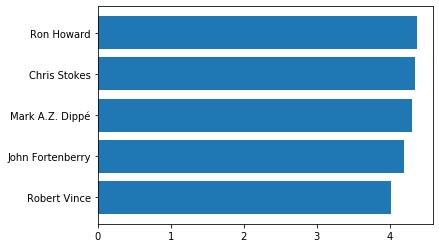

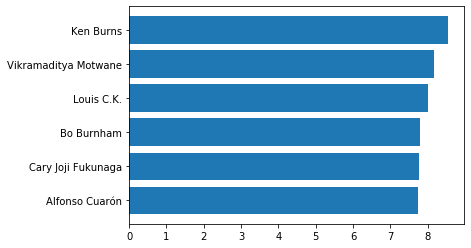

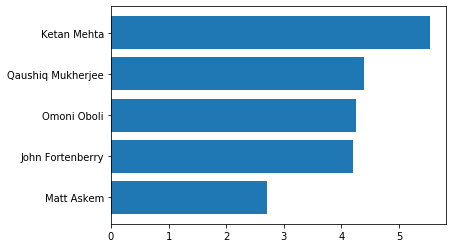

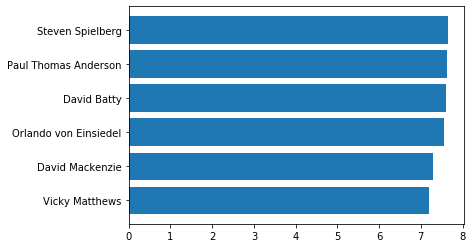

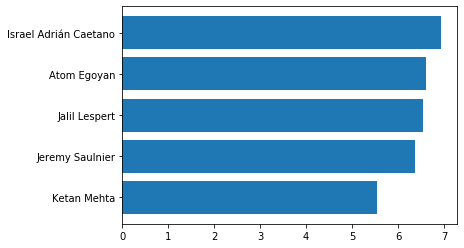

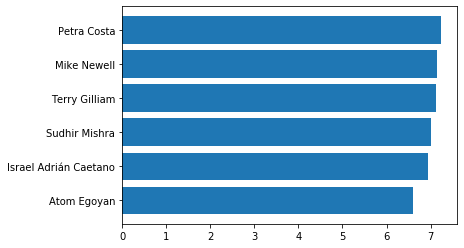

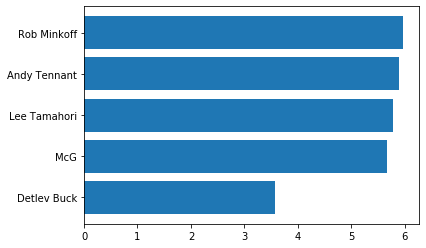

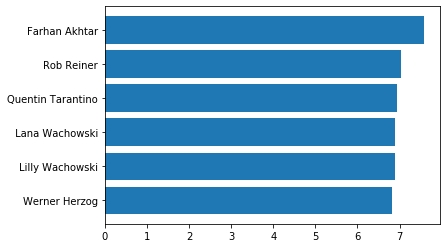

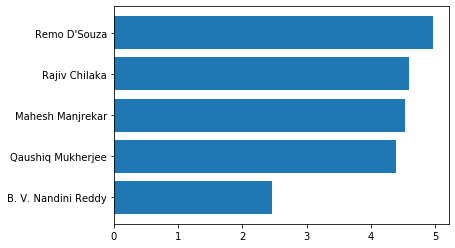

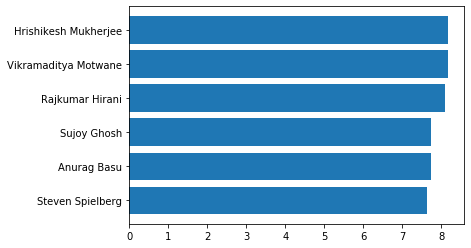

In [69]:
narisigraf(usap)
narisigraf(usaz)

narisigraf(ukp)
narisigraf(ukz)

narisigraf(frap)
narisigraf(praz)

narisigraf(gerp)
narisigraf(gerz)

narisigraf(indip)
narisigraf(indiz)